In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.random.randint(2,size=100)
X2 = np.random.randint(2,size=100)
X = np.column_stack((X,X2))
Y = np.transpose(np.random.randint(2,size=100))

In [9]:
def logreg_predict_proba_metrics(X, y, n_simulations=1000, cutoff=0.7, sync=False, seed=[]):

    # select seed for each simulation
    if len(seed)!=n_simulations:
        seed = np.random.randint(100000, size=n_simulations)

    # initialize arrays for LR results
    lr_predict = np.zeros((int((1-cutoff)*len(X)),n_simulations))
    lr_proba = np.zeros((int((1-cutoff)*len(X)), 2))
    lr_score = np.zeros(n_simulations)
    metrics = np.zeros((4,2))

    for i in range(n_simulations):
        np.random.seed(seed[i])
        idx = np.random.permutation(len(X))
        idx_train = idx[0:int(len(X)*cutoff)]
        idx_test = idx[int(len(X)*cutoff):]

        X_train = X[idx_train]
        X_test = X[idx_test]

        Y_train = Y[idx_train]
        Y_test = Y[idx_test]

        lr = LogisticRegression()
        lr.fit(X_train, Y_train)
        print(X_test.shape)
        print(Y_test.shape)
        lr_proba = np.dstack((lr_proba, lr.predict_proba(X_test)))
        lr_predict[:,i] = lr.predict(X_test)
        lr_score[i] = lr.score(X_test, Y_test)
        metrics_temp = sklearn.metrics.precision_recall_fscore_support(Y_test, lr_predict[:,i])
        metrics = np.dstack((metrics, np.array(metrics_temp)))
        
        #lr1_switch_predict = np.abs([lr1_choice_predict[n] - X_test[n,9] for n in range(len(lr1_choice_predict))])
        #lr1_metrics_switch = sklearn.metrics.precision_recall_fscore_support(Y_test_switch, lr1_switch_predict[:,i])

    # clean up from initializing 3d stacks with zeros
    metrics = metrics[:,:,1:n_simulations+1]
    lr_proba = lr_proba[:,:,1:n_simulations+1]
    
    
    
    if sync==True: 
        return metrics, lr_predict, lr_proba, lr_score, seed
    return metrics, lr_predict, lr_proba, lr_score

In [4]:
Y.shape

(100,)

In [5]:
X.shape

(100, 2)

In [10]:
metrics, lr_predict, lr_proba, lr_score = lr_bandit(X, Y, n_simulations=10)

(30, 2)
(30,)
(30, 2)
(30,)
(30, 2)
(30,)
(30, 2)
(30,)
(30, 2)
(30,)
(30, 2)
(30,)
(30, 2)
(30,)
(30, 2)
(30,)
(30, 2)
(30,)
(30, 2)
(30,)


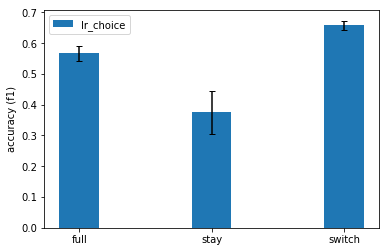

In [7]:
import matplotlib.pyplot as plt
n_simulations=10
height_a = [np.mean(lr_score), np.mean(metrics[2,0,:]), np.mean(metrics[2,1,:])]
ystd1 = [np.std(lr_score), np.std(metrics[2,0,:]), np.std(metrics[2,1,:])]
yerr1 = [ystd1[i] / np.sqrt(n_simulations) for i in range(len(ystd1))]

barWidth = 0.3
# The x position of bars
r1 = np.arange(len(height_a))

conditions = ['full', 'stay', 'switch']
plt.bar(r1, height_a, width=barWidth, label='lr_choice', yerr=yerr1, capsize=3)

plt.xticks(range(len(height_a)), conditions)
plt.ylabel('accuracy (f1)')
plt.legend()
plt.show()